In [2]:
import pandas as pd
import numpy as np
!pip install cufflinks
!pip install plotly
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.7 MB/s eta 0:00:00


In [3]:
import cufflinks as cf
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import plotly.io as pio 
import cufflinks as cf
cf.go_offline()
import plotly
import plotly.graph_objs as go
import plotly.offline as py
import chart_studio.plotly as pyo

In [4]:
import chart_studio
import chart_studio.plotly as pyo 

In [5]:
chart_studio.tools.set_credentials_file(username = 'AIROTIV', api_key='w9A6F1Humpbgnzw7bXO5')

In [6]:
pio.renderers.default = 'colab'

In [9]:
data = pd.read_csv("df_brasil2020.csv")
data

,Unnamed: 0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-01,31,210147125.0,2707877,45392,93563,1088,1865729.0,748585.0
1,1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-02,32,210147125.0,2733677,25800,94104,541,1883677.0,755896.0
2,2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-03,32,210147125.0,2750318,16641,94665,561,1912319.0,743334.0
3,3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-04,32,210147125.0,2801921,51603,95819,1154,1970767.0,735335.0
4,4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-05,32,210147125.0,2857597,55676,97240,1421,2020637.0,741180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,148,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-12-27,53,210147125.0,7484285,18479,191139,344,6475466.0,799545.0
149,149,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-12-28,53,210147125.0,7504833,20548,191570,431,6515370.0,777776.0
150,150,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-12-29,53,210147125.0,7563551,58718,192681,1111,6568898.0,744365.0
151,151,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-12-30,53,210147125.0,7619200,55649,193875,1194,6647538.0,723332.0


In [10]:
colunas_indesejáveis=['populacaoTCU2019','estado','municipio','coduf','codmun','codRegiaoSaude','nomeRegiaoSaude','casosNovos','casosAcumulado','emAcompanhamentoNovos','Recuperadosnovos']
data = data.drop(colunas_indesejáveis, axis=1)

In [11]:
data

,Unnamed: 0,regiao,data,semanaEpi,obitosAcumulado,obitosNovos
0,0,Brasil,2020-08-01,31,93563,1088
1,1,Brasil,2020-08-02,32,94104,541
2,2,Brasil,2020-08-03,32,94665,561
3,3,Brasil,2020-08-04,32,95819,1154
4,4,Brasil,2020-08-05,32,97240,1421
...,...,...,...,...,...,...
148,148,Brasil,2020-12-27,53,191139,344
149,149,Brasil,2020-12-28,53,191570,431
150,150,Brasil,2020-12-29,53,192681,1111
151,151,Brasil,2020-12-30,53,193875,1194


<Axes: >

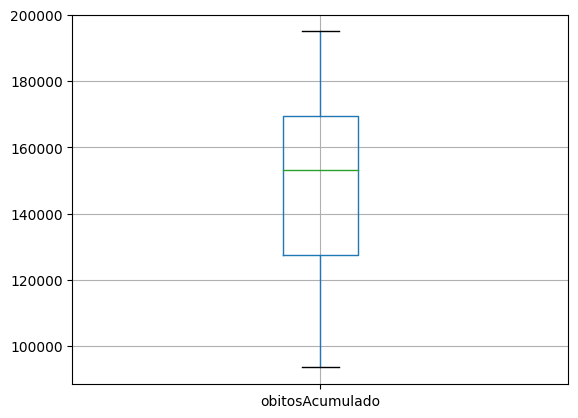

In [12]:
data.boxplot(column = 'obitosAcumulado')

In [13]:
semanas_totais = ["sem31",'sem32','sem33','sem34','sem35','sem36','sem37','sem38','sem39','sem40','sem41','sem42','sem43','sem44','sem45','sem46','sem47','sem48','sem49','sem50','sem51','sem52','sem53']

In [14]:
data.iplot(kind='scatter', x='semanaEpi', y='obitosAcumulado')

In [15]:
data.data = pd.to_datetime(data.data)

In [16]:
data['data_mes'] = data.data.dt.to_period('M').astype(str)

In [17]:
mortes_mes = data.groupby(by='data_mes').obitosNovos.sum()

In [19]:
data = [go.Bar(x=mortes_mes.index,
               y=mortes_mes.values,
               marker= {'color': 'coral'})]

#criando layout
configuracoes_layout = go.Layout(title='Óbitos por mês: ',
                                 yaxis={'title': 'Óbitos novos'},
                                 xaxis={'title': 'Mês'})

#objeto figura

fig = go.Figure(data=data, layout=configuracoes_layout)

#plotando o grafico
py.iplot(fig)
pyo.plot(fig)

'https://plotly.com/~AIROTIV/15/'

In [21]:
data = [go.Scatter(x=mortes_mes.index,
                   y=mortes_mes.values)]

py.iplot(data)
pyo.plot(data)

'https://plotly.com/~AIROTIV/18/'